## <p style="background-color:#34495E; font-family:newtimeroman; color:lightgray; font-size:110%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">Visualizing Missing Data</p>

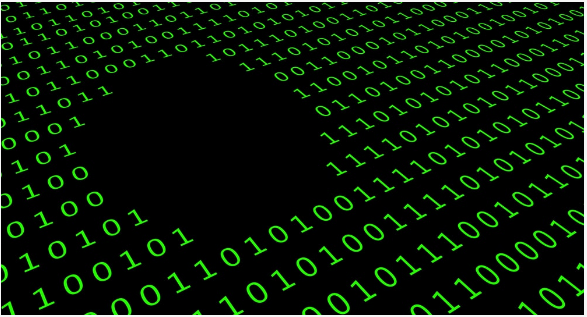

Image Source: [www.thermofisher.com](https://www.thermofisher.com/blog/proteomics/solving-the-missing-value-problem-in-data-dependent-acquisition-mass-spectrometry/)

Missing values are common in real-world datasets. Missing data cannot be ignored, as it may lead to a lack of precision in the statistical analysis. Otherwise, they may affect our analysis and the decisions we make.

Visualization of the missing data is a way of getting insights into the completeness or nullity of a DataFrame at first look *(especially when working with large datasets)*. Visualizing the missing values provides a good understanding of the distribution of NaN values in the data set. 

There are a variety of plots to visualize missing data. In this notebook, we will focus on some of them and the missingno Python library.

### CONTENT
<a id='content'></a>


- 1) [Data Review](#phase1)


- 2) [Seaborn Heatmap](#phase2)

   
- 3) [Seaborn Displot](#phase3)

    
- 4) [Missingno Library](#phase4)
    * 4.1 [msno.matrix](#part4.1)
    * 4.2 [msno.bar](#part4.2)
    * 4.3 [msno.heatmap](#part4.3)
    * 4.4 [msno.dendrogram](#part4.4)

## <p style="background-color:seagreen; color:lightgray; font-family:newtimeroman; font-size:110%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">1. Data Review<a id='phase1'></p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.style import set_palette
set_palette('flatui')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
df = pd.read_csv('used_cars.csv', usecols=list(range(24)), nrows=5000)
df.head()

,Make_Model,Body_Type,Price,Vat,Age,Type,Km,Previous_Owners,Inspection_New,Warranty (Months),...,Upholstery_Type,Upholstery_Color,Fuel,Drive_Chain,Gearing_Type,Gears,Hp_kW,Displacement_cc,Cylinders,Weight_kg
0,Audi A1,Sedans,15770,VAT deductible,3.000,Used,56013.000,2.000,Yes,NaN,...,Cloth,Black,Diesel,front,Automatic,NaN,66.000,1422.000,3.000,1220.000
1,Audi A1,Sedans,14500,Price negotiable,2.000,Used,80000.000,NaN,NaN,NaN,...,Cloth,Grey,Benzine,front,Automatic,7.000,141.000,1798.000,4.000,1255.000
2,Audi A1,Sedans,14640,VAT deductible,3.000,Used,83450.000,1.000,NaN,NaN,...,Cloth,Black,Diesel,front,Automatic,NaN,85.000,1598.000,NaN,NaN
3,Audi A1,Sedans,14500,NaN,3.000,Used,73000.000,1.000,NaN,NaN,...,NaN,NaN,Diesel,NaN,Automatic,6.000,66.000,1422.000,3.000,1195.000
4,Audi A1,Sedans,16790,NaN,3.000,Used,16200.000,1.000,Yes,NaN,...,Cloth,Black,Diesel,front,Automatic,NaN,66.000,1422.000,3.000,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make_Model         5000 non-null   object 
 1   Body_Type          4993 non-null   object 
 2   Price              5000 non-null   int64  
 3   Vat                3516 non-null   object 
 4   Age                4625 non-null   float64
 5   Type               4999 non-null   object 
 6   Km                 4734 non-null   float64
 7   Previous_Owners    2917 non-null   float64
 8   Inspection_New     1142 non-null   object 
 9   Warranty (Months)  1542 non-null   float64
 10  Body_Color         4890 non-null   object 
 11  Paint_Type         3301 non-null   object 
 12  Nr.OfDoors         4949 non-null   float64
 13  Nr.OfSeats         4761 non-null   float64
 14  Upholstery_Type    3456 non-null   object 
 15  Upholstery_Color   3514 non-null   object 
 16  Fuel               5000 

In [4]:
# number and percentage of missing values according to columns
{col: [df[col].isnull().sum(), f'% {np.round(np.mean(df[col].isnull()*100), 3)}'
      ] for col in df.columns if df[col].isnull().any()}

{'Body_Type': [7, '% 0.14'],
 'Vat': [1484, '% 29.68'],
 'Age': [375, '% 7.5'],
 'Type': [1, '% 0.02'],
 'Km': [266, '% 5.32'],
 'Previous_Owners': [2083, '% 41.66'],
 'Inspection_New': [3858, '% 77.16'],
 'Warranty (Months)': [3458, '% 69.16'],
 'Body_Color': [110, '% 2.2'],
 'Paint_Type': [1699, '% 33.98'],
 'Nr.OfDoors': [51, '% 1.02'],
 'Nr.OfSeats': [239, '% 4.78'],
 'Upholstery_Type': [1544, '% 30.88'],
 'Upholstery_Color': [1486, '% 29.72'],
 'Drive_Chain': [1826, '% 36.52'],
 'Gears': [1504, '% 30.08'],
 'Hp_kW': [3, '% 0.06'],
 'Displacement_cc': [77, '% 1.54'],
 'Cylinders': [1445, '% 28.9'],
 'Weight_kg': [2033, '% 40.66']}

## <p style="background-color:seagreen; font-family:newtimeroman; color:lightgray; font-size:110%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">2. Seaborn Heatmap<a id='phase2'></p>

[CONTENT](#content)

We can use seaborn.heatmap to visualize the nullity of the given DataFrame.

<AxesSubplot:>

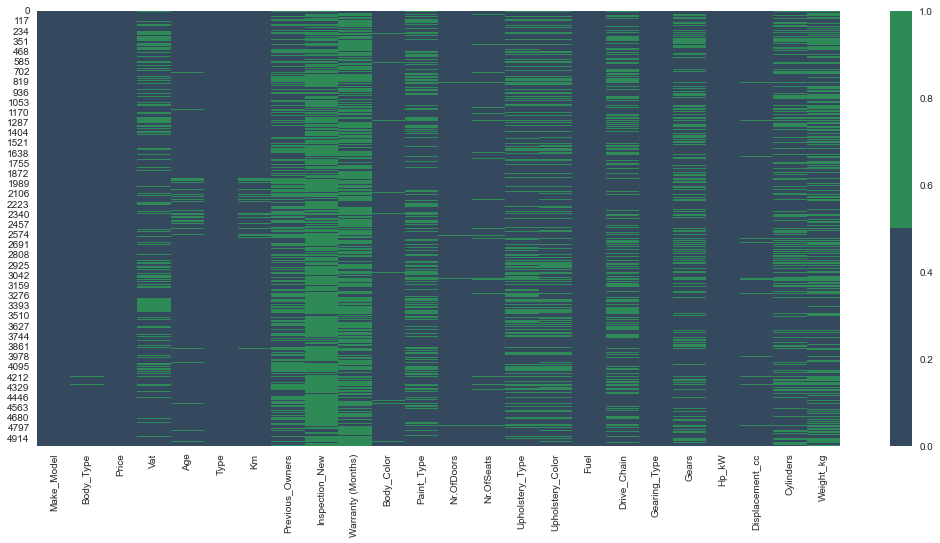

In [5]:
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

It is also possible to display the nullity correlation between columns

<AxesSubplot:>

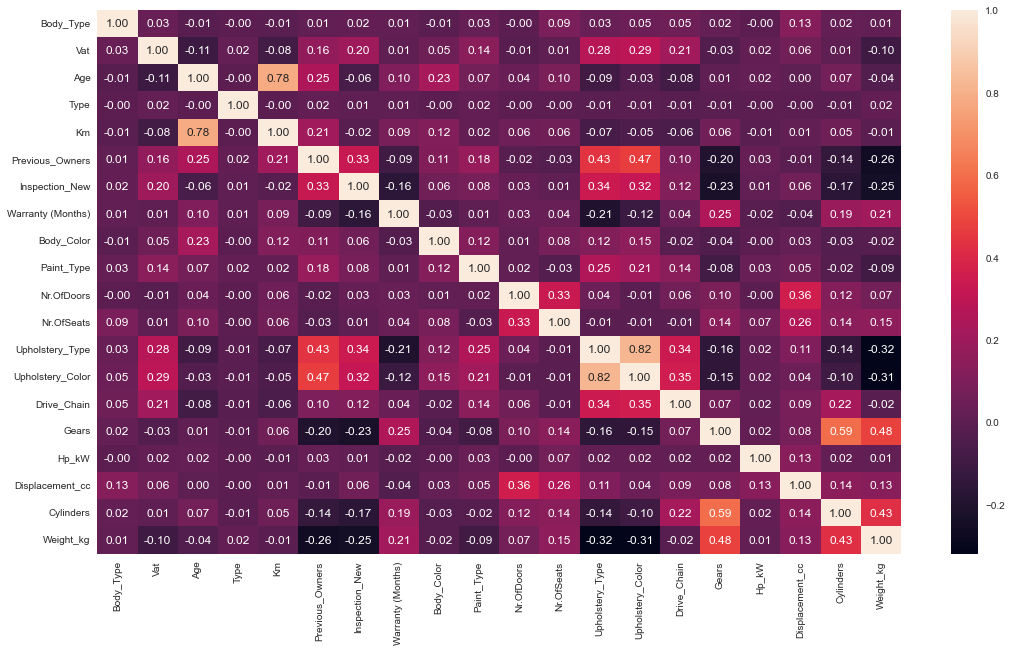

In [6]:
plt.figure(figsize=(18,10))
sns.heatmap(df.loc[:, df.isnull().any()].isnull().corr(), annot=True, fmt='.2f')

## <p style="background-color:seagreen; font-family:newtimeroman; color:lightgray; font-size:110%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">3. Seaborn Displot<a id='phase3'></p>

We can use seaborn.displot to visualize the nullity ratio according to columns.

It is also possible to specify a threshold value using a vertical line.

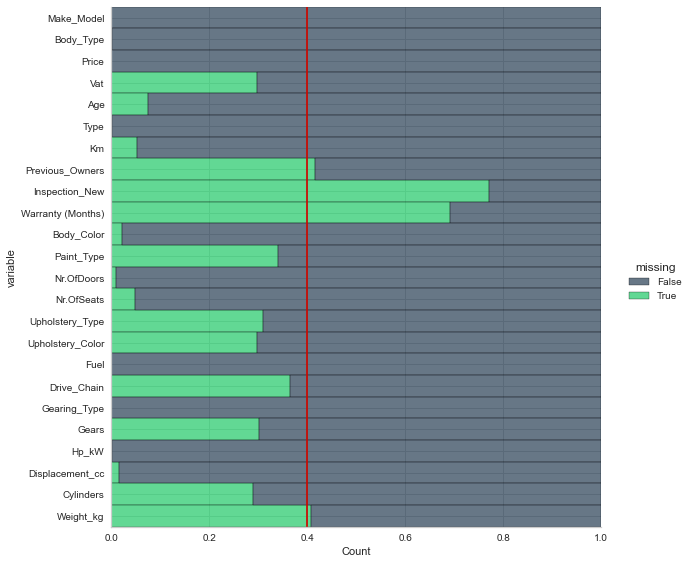

In [7]:
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

## <p style="background-color:seagreen; font-family:newtimeroman; color:lightgray; font-size:110%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">4. missingno library<a id='phase4'></p>

[CONTENT](#content)

**missingno** provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset.

[missingno documentation](https://github.com/ResidentMario/missingno)

In [ ]:
#pip install missingno

In [8]:
import missingno as msno

# 4.1 msno.matrix
<a id='part4.1'>

The nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

***param labels:*** Whether or not to display the column names. Defaults to the underlying data labels when there are
        **50** columns or less, and no labels when there are more than **50** columns.

<AxesSubplot:>

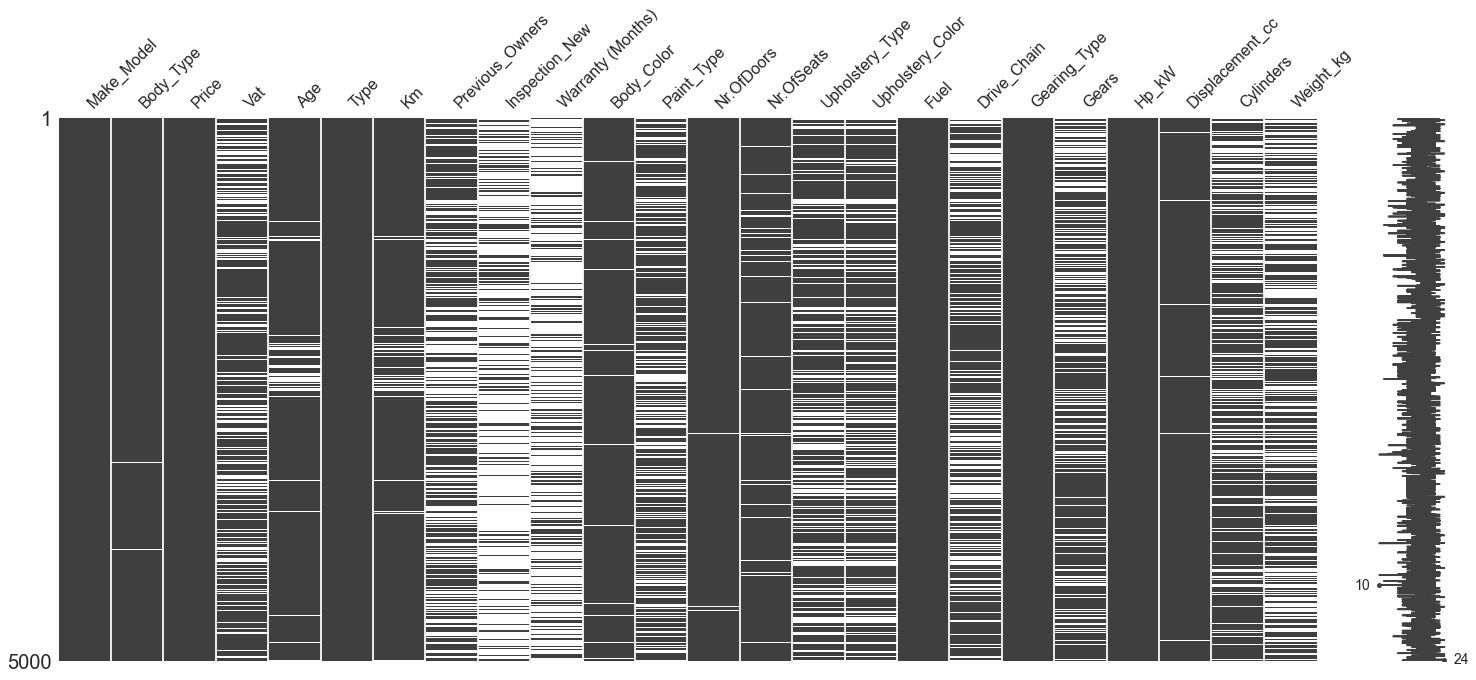

In [9]:
msno.matrix(df)

White lines indicate the location of missing values.

The **sparkline** at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

From the sparkline, we can see that there are observations without any missing values and the minimum number of values is **10**, even for rows with the maximum nullity.

***nullity filter***

we can filter a data frame according to its nullity using percentage thresholds.

<AxesSubplot:>

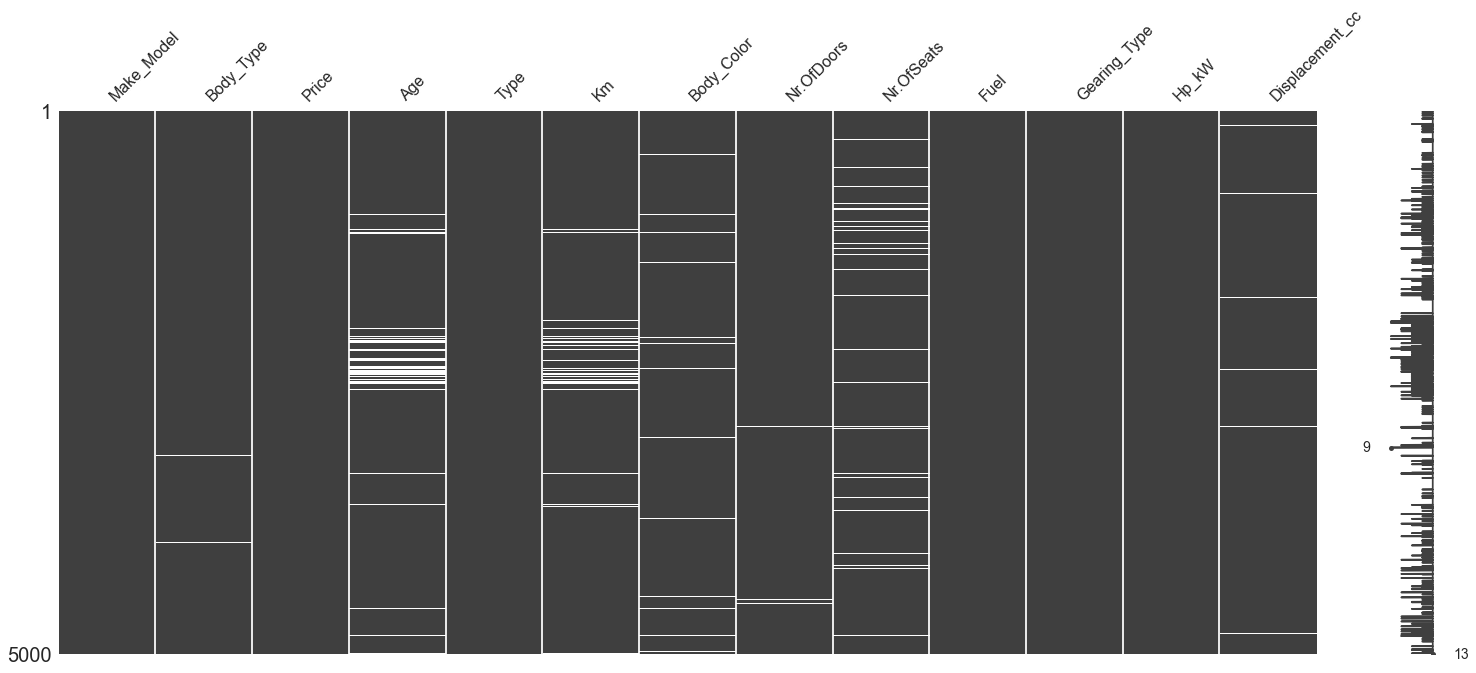

In [10]:
msno.matrix(df, filter='top', p=0.9)
# it will limit the dataframe to columns with at least 0.9 completeness

<AxesSubplot:>

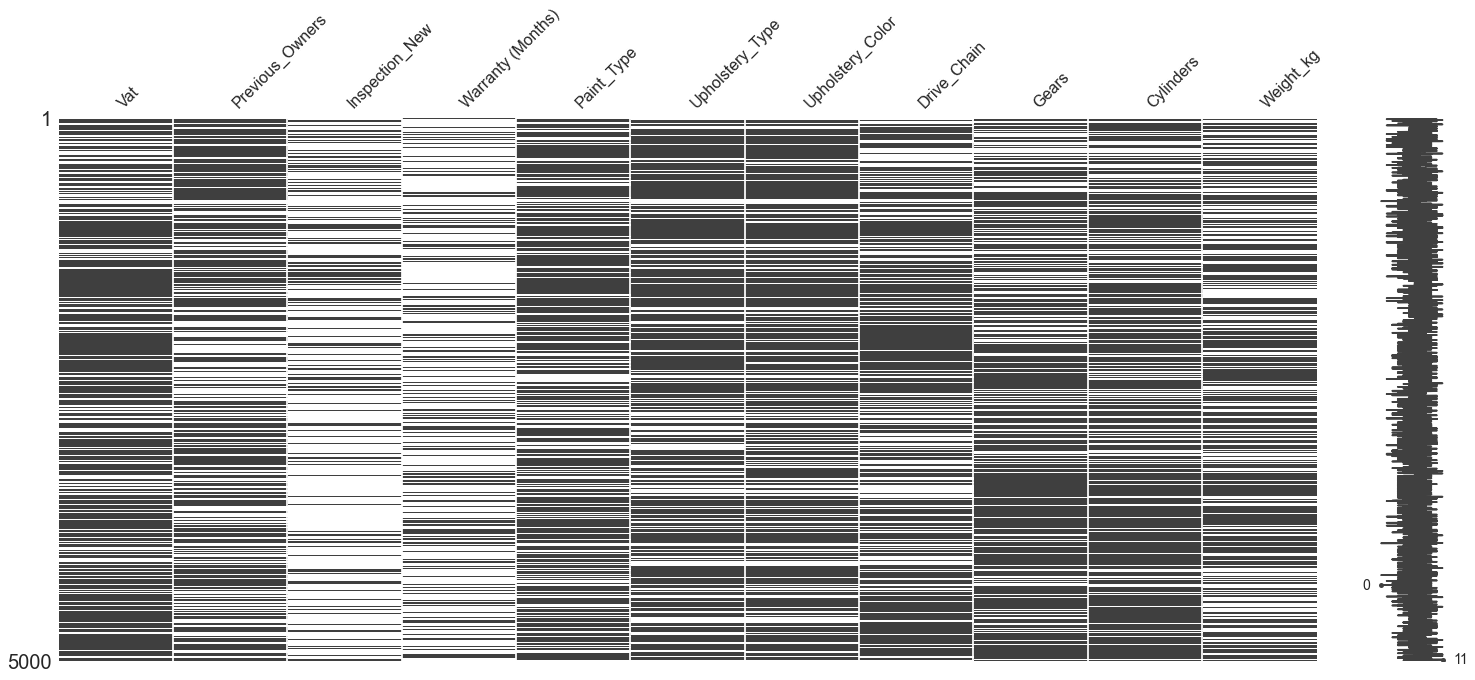

In [11]:
msno.matrix(df, filter='bottom', p=0.9)
# it will limit the dataframe to columns with at least 0.9 nullity

***color & legend***

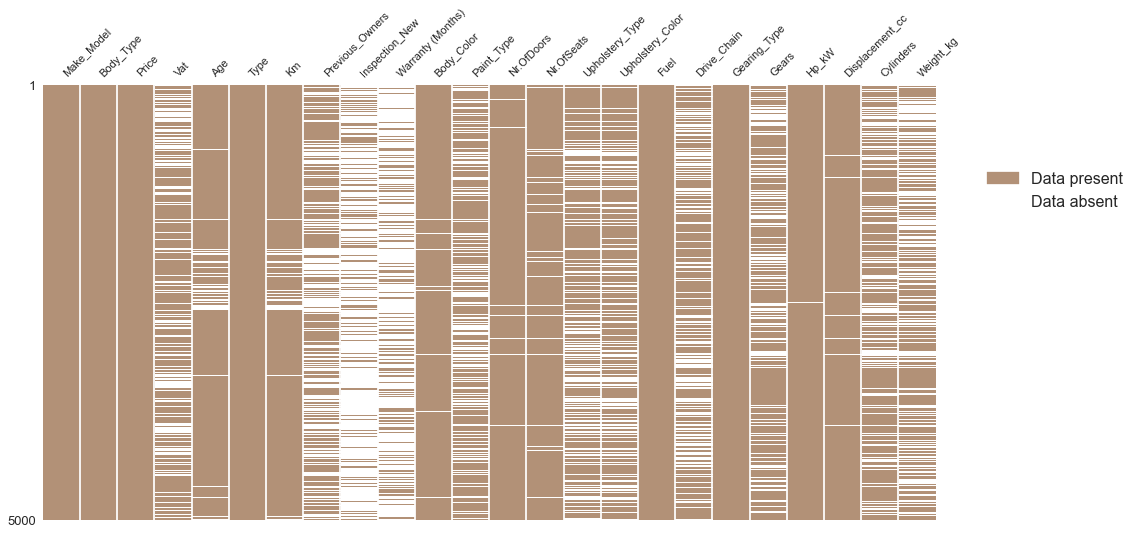

In [12]:
import matplotlib.patches as mpatches

msno.matrix(df, sparkline=False, figsize=(16,8), fontsize=11, color=(0.7, 0.57, 0.47));

gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')

plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.show()

# 4.2 msno.bar
<a id='part4.2'>

msno.bar is a simple visualization of nullity by column. It allows you to visualize missing values as a bar chart.

<AxesSubplot:>

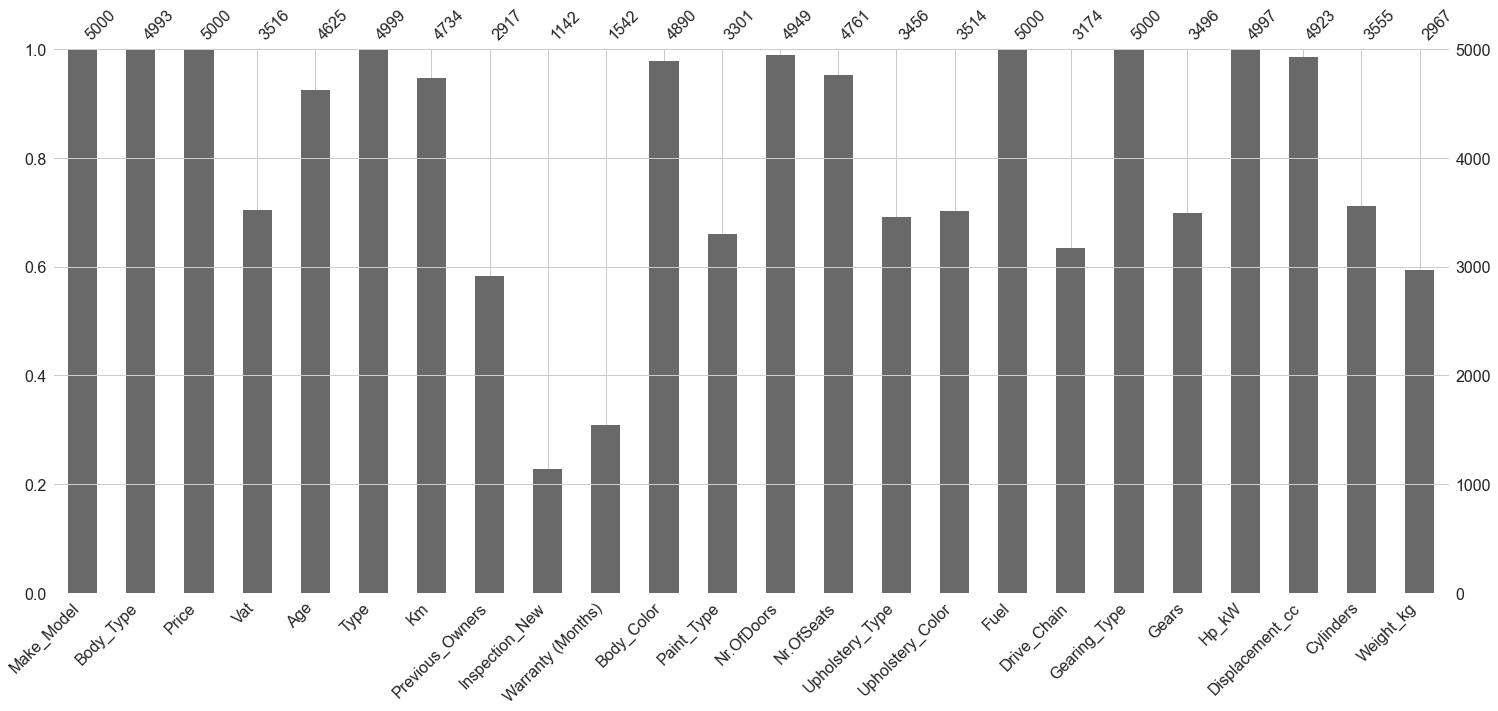

In [13]:
msno.bar(df)

it is possible to display a logarithmic plot with the help of the **log** parameter

<AxesSubplot:>

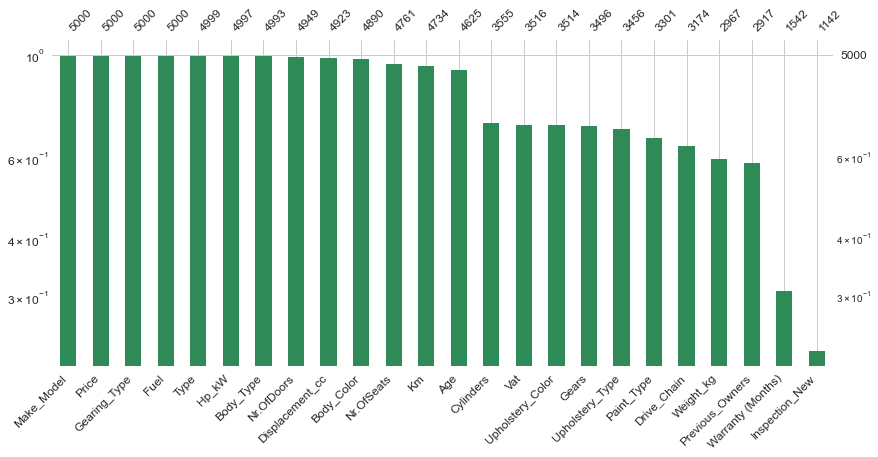

In [14]:
msno.bar(df, figsize=(14,6), fontsize=12, color="seagreen", log=True, sort="descending")

# 4.3 msno.heatmap
<a id='part4.3'>

[CONTENT](#content)

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

Variables that are always full or always empty are not included in the visualization as they have no significant correlation.

The nullity correlation ranges from -1 to 1.

- -1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
- 0 - No correlation represents that variables values present or absent do not have any effect on one another.
- 1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.

***The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets. For those, try the dendrogram instead.***

Source: [missingno](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

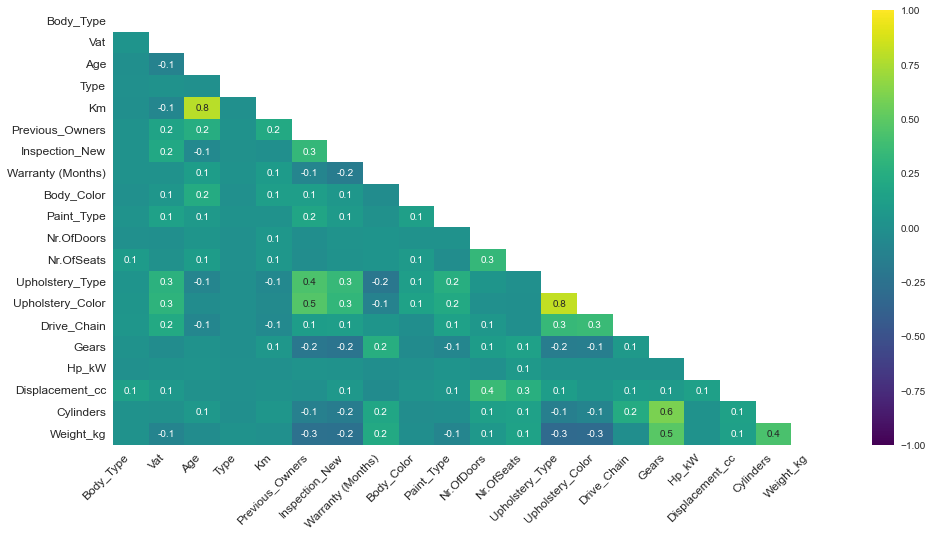

In [15]:
msno.heatmap(df, figsize=(16,8), cmap="viridis", fontsize=12)

# 4.4 msno.dendrogram
<a id='part4.4'>

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance).

<AxesSubplot:>

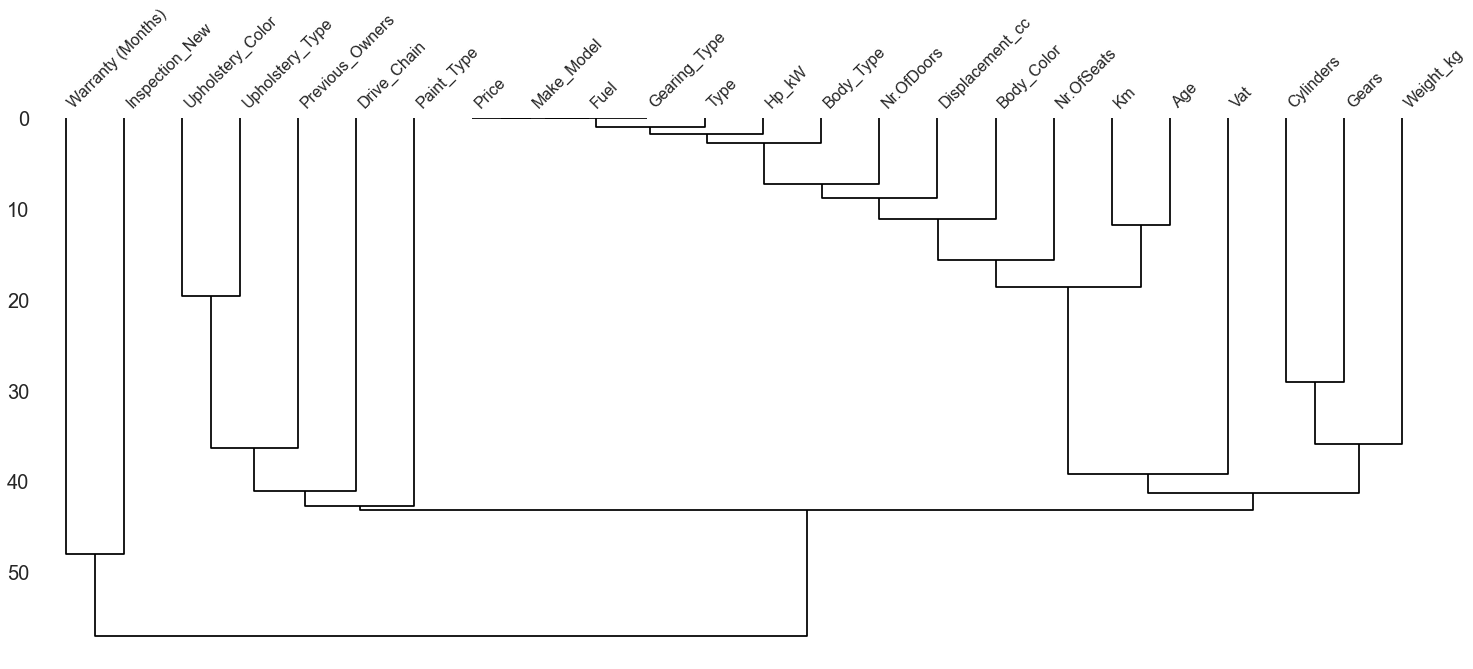

In [16]:
msno.dendrogram(df)